In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
basedir = '_run_output'
dir1 = 'couple_prob'#sorted(os.listdir(basedir))[0]
probs = sorted(os.listdir(os.path.join(basedir, dir1)))
#dflist = []
df = None
for prd in probs:
    sdirs = sorted(os.listdir(os.path.join(basedir, dir1, prd)))
    #df = None
    prob = prd.replace(dir1+'_', '')
    for sd in sdirs:
        #fs = sorted(os.listdir(os.path.join(basedir, dir1, prd, sd)))
        #print(fs)
        seed = sd.split('_')[2]
        f = 'stored_sex_age_stats.csv'
        fp = os.path.join(basedir, dir1, prd, sd, f)
        df_temp = pd.read_csv(fp, index_col=0)
        df_temp['prob'] = prob
        df_temp['seed'] = seed
        #print(df_temp.head())
        if df is None:
            df = df_temp
        else:
            df = df.append(df_temp)
        #break
    #dflist.append(df)
    print('done', prob)
    #break

done 0.0
done 0.1
done 0.2
done 0.3
done 0.4
done 0.5
done 0.6
done 0.7
done 0.8
done 0.9
done 1.0


In [16]:
df.head()

,time,age,male,female,prob,seed
ind,,,,,,
0,0,0,24,23,0.0,s152745
1,0,1,133,128,0.0,s152745
2,0,2,142,134,0.0,s152745
3,0,3,125,148,0.0,s152745
4,0,4,150,132,0.0,s152745


In [26]:
sorted(list(set(df.prob.tolist())))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [33]:
df['age'] = pd.to_numeric(df['age'])
df['male'] = pd.to_numeric(df['male'])
df['female'] = pd.to_numeric(df['female'])
df['prob'] = pd.to_numeric(df['prob'])
df['population'] = df['male']+df['female']

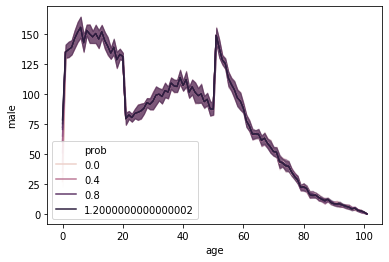

In [23]:
sns.lineplot(x='age', y='male', hue='prob', data=df[df['time']==0])

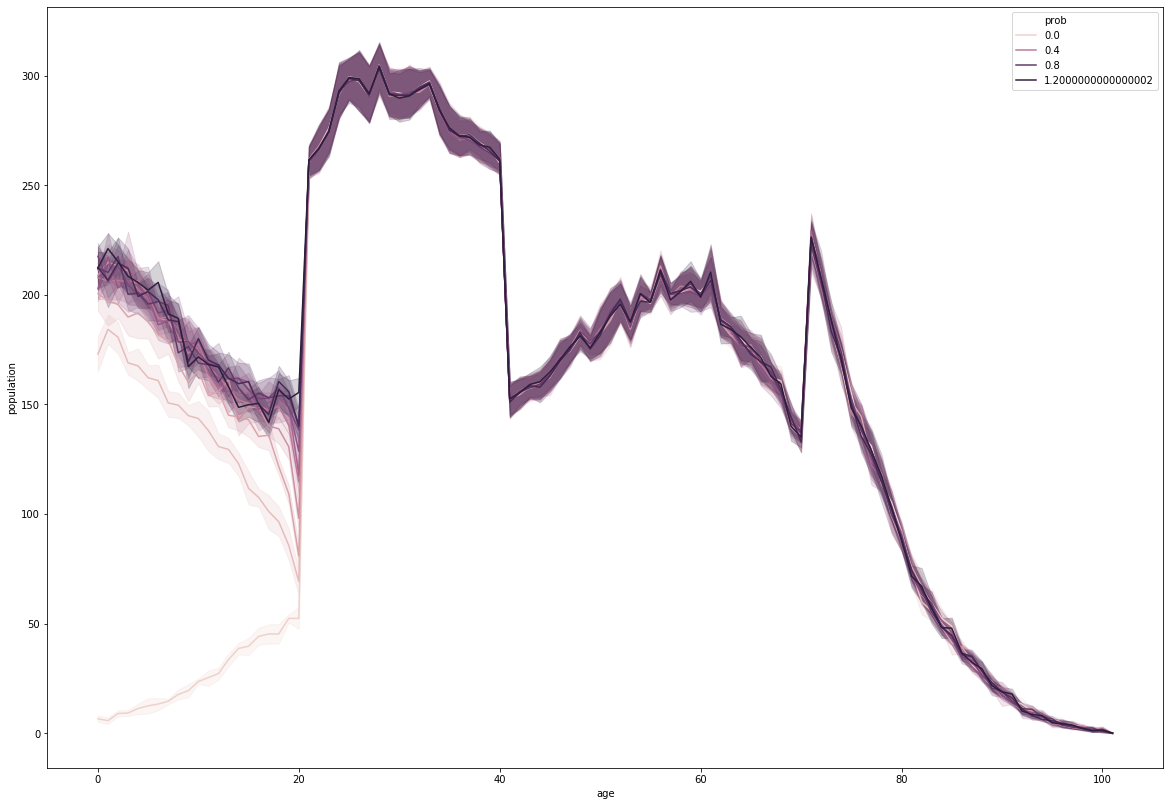

In [35]:
fig, ax = plt.subplots(figsize=(20,14))
sns.lineplot(x='age', y='population', hue='prob', data=df[df['time']==20], ax=ax)

In [28]:
sorted(list(set(df[df['time']==20]['prob'].tolist())))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [29]:
max(df.time.tolist())

20